# Q.2)Prepare a prediction model for profit of 50_startups data.
## Do transformations for getting better predictions of profit and make a table containing R^2 value for each prepared model.

### R&D Spend -- Research and devolop spend in the past few years
### Administration -- spend on administration in the past few years
### Marketing Spend -- spend on Marketing in the past few years
### State -- states from which data is collected
### profit -- profit of each state in the past few years


In [1]:
import pandas as pd
import numpy as np

In [2]:
data=pd.read_csv('50_Startups.csv')
data.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


# EDA 

In [3]:
data.shape

(50, 5)

In [4]:
data.describe(include='all')

,R&D Spend,Administration,Marketing Spend,State,Profit
count,50.000000,50.000000,50.000000,50,50.000000
unique,NaN,NaN,NaN,3,NaN
top,NaN,NaN,NaN,New York,NaN
freq,NaN,NaN,NaN,17,NaN
mean,73721.615600,121344.639600,211025.097800,NaN,112012.639200
std,45902.256482,28017.802755,122290.310726,NaN,40306.180338
min,0.000000,51283.140000,0.000000,NaN,14681.400000
25%,39936.370000,103730.875000,129300.132500,NaN,90138.902500
50%,73051.080000,122699.795000,212716.240000,NaN,107978.190000
75%,101602.800000,144842.180000,299469.085000,NaN,139765.977500


In [5]:
# check for null
data.isnull().sum()

R&D Spend          0
Administration     0
Marketing Spend    0
State              0
Profit             0
dtype: int64

### No null value present in dataset.

In [6]:
#check for duplicate value
data.duplicated().sum()

0

In [7]:
corr_=data.corr()
corr_

,R&D Spend,Administration,Marketing Spend,Profit
R&D Spend,1.000000,0.241955,0.724248,0.972900
Administration,0.241955,1.000000,-0.032154,0.200717
Marketing Spend,0.724248,-0.032154,1.000000,0.747766
Profit,0.972900,0.200717,0.747766,1.000000


Text(0.5, 1.0, 'Heatmap')

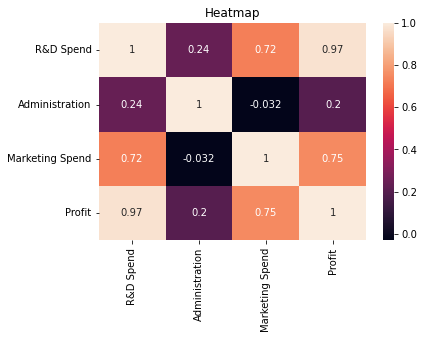

In [8]:
#heatmap
import matplotlib.pyplot as plt
import seaborn as sns
sns.heatmap(corr_, annot=True)
plt.title('Heatmap')

### By observing the heatmap,we can say that there is no multicollinearity between input variables. Hence,assumption of no multicollinearity satisfied.

# Data Visualization

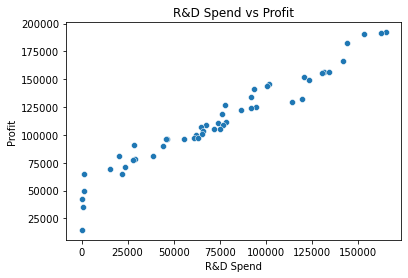

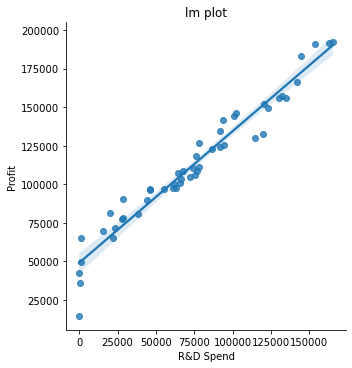

In [9]:
#Scatter plot
import matplotlib.pyplot as plt
sns.scatterplot(x='R&D Spend',y='Profit',data=data)
plt.title('R&D Spend vs Profit')

#lm plot for linearity
sns.lmplot(x='R&D Spend',y='Profit',data=data)
plt.title('lm plot')
plt.show()

### by observing above scatter plot,we can say that as R&D Spend increases Profit increases. i.e. there is a strong positive correlation between R&D Spend and Profit
### by observing lm plot we can't say that our data is linear

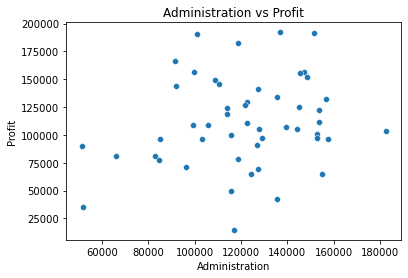

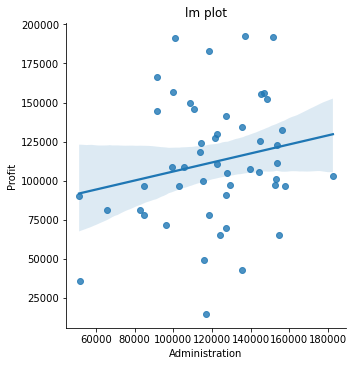

In [10]:
#Scatter plot
import matplotlib.pyplot as plt
sns.scatterplot(x='Administration',y='Profit',data=data)
plt.title('Administration vs Profit')

#lm plot for linearity
sns.lmplot(x='Administration',y='Profit',data=data)
plt.title('lm plot')
plt.show()

### by observing above scatter plot,we can say that there is a positive correlation,but we can't say that there is a strong relationship between these two variable because the points are scatter.
### by observing lm plot we can't say that our data is linear 

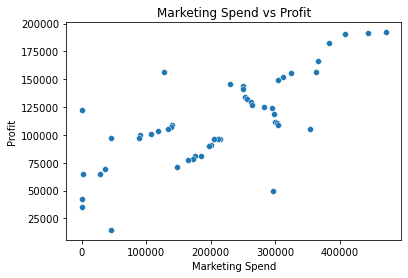

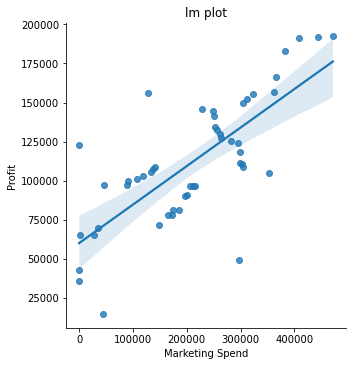

In [11]:
#scatter plot 
sns.scatterplot(x='Marketing Spend',y='Profit',data=data)
plt.title('Marketing Spend vs Profit')

#lm plot for linearity
sns.lmplot(x='Marketing Spend',y='Profit',data=data)
plt.title('lm plot')
plt.show()

### Again there is a a positive correlation between Market Spend and Profit. but it not indicates the relationship is strong enough
### by observing lm plot we can't say that our data is linear

In [12]:
#distplots() and probplots() to check normality 
from scipy import stats

def plot(data,variable):
    plt.figure(figsize=(14,6))
    plt.subplot(1,2,1)
    sns.distplot(data[variable])
    plt.grid(True)
    plt.title(variable)
    plt.subplot(1,2,2)
    stats.probplot(data[variable],dist='norm',plot=plt)
    plt.grid(True)
    plt.show()

C:\Users\Lenovo\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


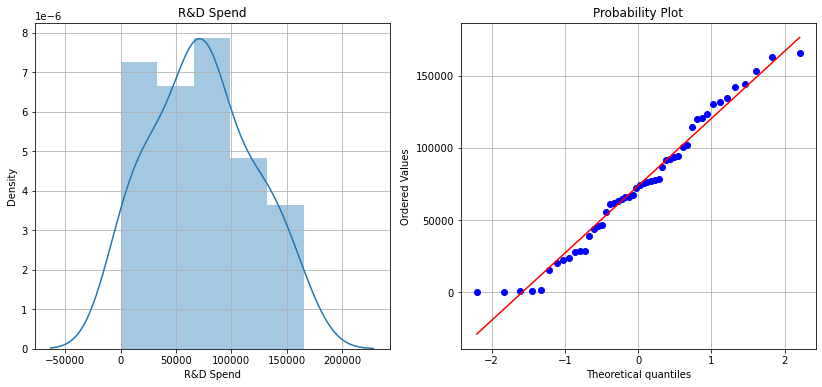

C:\Users\Lenovo\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


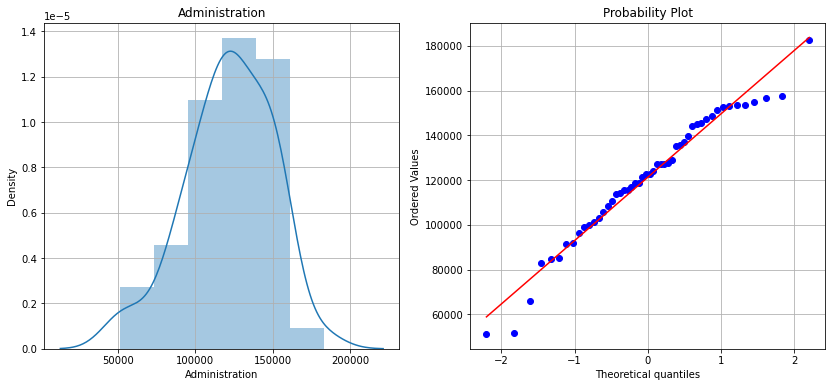

C:\Users\Lenovo\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


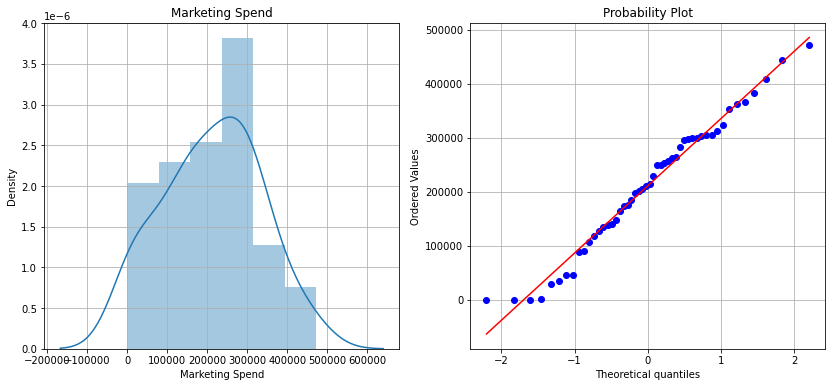

(None, None, None)

In [13]:
# function call
plot(data,'R&D Spend') , plot(data,'Administration') ,plot(data,'Marketing Spend')

In [14]:
#skewness
data.skew()

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_3208\894816337.py:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  data.skew()


R&D Spend          0.164002
Administration    -0.489025
Marketing Spend   -0.046472
Profit             0.023291
dtype: float64

### above observation, we can say our data follows the normal distribution.

In [15]:
#kurtosis
data.kurtosis()

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_3208\155736255.py:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  data.kurtosis()


R&D Spend         -0.761465
Administration     0.225071
Marketing Spend   -0.671701
Profit            -0.063859
dtype: float64

### by observing kurtosis we can say that our input variables maybe not contains any outliers 

# Data Preparation

In [20]:
#dropping unneccesory column from our data
data=data.drop(['State'], axis=1)
data.columns=['R_D_Spend','Administration','Marketing_Spend','Profit']
data.head()

,R_D_Spend,Administration,Marketing_Spend,Profit
0,165349.20,136897.80,471784.10,192261.83
1,162597.70,151377.59,443898.53,191792.06
2,153441.51,101145.55,407934.54,191050.39
3,144372.41,118671.85,383199.62,182901.99
4,142107.34,91391.77,366168.42,166187.94


# Model Building || Model Training 

In [21]:
#model fitting by using raw data
import statsmodels.formula.api as smf
model=smf.ols('Profit~R_D_Spend+Administration+Marketing_Spend',data=data).fit()

In [22]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Profit   R-squared:                       0.951
Model:                            OLS   Adj. R-squared:                  0.948
Method:                 Least Squares   F-statistic:                     296.0
Date:                Tue, 18 Oct 2022   Prob (F-statistic):           4.53e-30
Time:                        08:51:43   Log-Likelihood:                -525.39
No. Observations:                  50   AIC:                             1059.
Df Residuals:                      46   BIC:                             1066.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept        5.012e+04   6572.353      7.626      0.000    3.69e+04    6.34e+04
R_D_Spend           0.8057      0.045     17.846      0.000       0.715       0.897
Administration     -0.0268      0.051     -0.526      0.602      -0.130       0.076
Marketing_Spend     0.0272      0.016      1.655      0.105      -0.006       0.060
==============================================================================
Omnibus:                       14.838   Durbin-Watson:                   1.282
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               21.442
Skew:                          -0.949   Prob(JB):                     2.21e-05
Kurtosis:                       5.586   Cond. No.                     1.40e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.4e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### the R squared value is: 0.951 and 'Administration' is insignificant due to high p Values.

In [23]:
#coefficients
model.params

Intercept          50122.192990
R_D_Spend              0.805715
Administration        -0.026816
Marketing_Spend        0.027228
dtype: float64

## Build model individually using SLR

In [24]:
import statsmodels.formula.api as smf
model_1=smf.ols('Profit~Administration',data=data).fit()

In [25]:
model_1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Profit   R-squared:                       0.040
Model:                            OLS   Adj. R-squared:                  0.020
Method:                 Least Squares   F-statistic:                     2.015
Date:                Tue, 18 Oct 2022   Prob (F-statistic):              0.162
Time:                        08:51:55   Log-Likelihood:                -599.63
No. Observations:                  50   AIC:                             1203.
Df Residuals:                      48   BIC:                             1207.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept       7.697e+04   2.53e+04      3.040      0.004    2.61e+04    1.28e+05
Administration     0.2887      0.203      1.419      0.162      -0.120       0.698
==============================================================================
Omnibus:                        0.126   Durbin-Watson:                   0.099
Prob(Omnibus):                  0.939   Jarque-Bera (JB):                0.110
Skew:                           0.093   Prob(JB):                        0.947
Kurtosis:                       2.866   Cond. No.                     5.59e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.59e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [26]:
import statsmodels.formula.api as smf
model_2=smf.ols('Profit~R_D_Spend',data=data).fit()

In [27]:
model_2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Profit   R-squared:                       0.947
Model:                            OLS   Adj. R-squared:                  0.945
Method:                 Least Squares   F-statistic:                     849.8
Date:                Tue, 18 Oct 2022   Prob (F-statistic):           3.50e-32
Time:                        08:52:01   Log-Likelihood:                -527.44
No. Observations:                  50   AIC:                             1059.
Df Residuals:                      48   BIC:                             1063.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   4.903e+04   2537.897     19.320      0.000    4.39e+04    5.41e+04
R_D_Spend      0.8543      0.029     29.151      0.000       0.795       0.913
==============================================================================
Omnibus:                       13.727   Durbin-Watson:                   1.116
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               18.536
Skew:                          -0.911   Prob(JB):                     9.44e-05
Kurtosis:                       5.361   Cond. No.                     1.65e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.65e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [28]:
model_3=smf.ols('Profit~Marketing_Spend',data=data).fit()
model_3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Profit   R-squared:                       0.559
Model:                            OLS   Adj. R-squared:                  0.550
Method:                 Least Squares   F-statistic:                     60.88
Date:                Tue, 18 Oct 2022   Prob (F-statistic):           4.38e-10
Time:                        08:52:04   Log-Likelihood:                -580.18
No. Observations:                  50   AIC:                             1164.
Df Residuals:                      48   BIC:                             1168.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept            6e+04   7684.530      7.808      0.000    4.46e+04    7.55e+04
Marketing_Spend     0.2465      0.032      7.803      0.000       0.183       0.310
==============================================================================
Omnibus:                        4.420   Durbin-Watson:                   1.178
Prob(Omnibus):                  0.110   Jarque-Bera (JB):                3.882
Skew:                          -0.336   Prob(JB):                        0.144
Kurtosis:                       4.188   Cond. No.                     4.89e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.89e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### By above observation we see that 'R_D_Spend' and 'Marketing_Spend' is more siginificant to predict the profit. so build the model by taking both and excluding 'Administration'

In [29]:
model_4=smf.ols('Profit~R_D_Spend+Marketing_Spend',data=data).fit()
model_4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Profit   R-squared:                       0.950
Model:                            OLS   Adj. R-squared:                  0.948
Method:                 Least Squares   F-statistic:                     450.8
Date:                Tue, 18 Oct 2022   Prob (F-statistic):           2.16e-31
Time:                        08:52:08   Log-Likelihood:                -525.54
No. Observations:                  50   AIC:                             1057.
Df Residuals:                      47   BIC:                             1063.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept        4.698e+04   2689.933     17.464      0.000    4.16e+04    5.24e+04
R_D_Spend           0.7966      0.041     19.266      0.000       0.713       0.880
Marketing_Spend     0.0299      0.016      1.927      0.060      -0.001       0.061
==============================================================================
Omnibus:                       14.677   Durbin-Watson:                   1.257
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               21.161
Skew:                          -0.939   Prob(JB):                     2.54e-05
Kurtosis:                       5.575   Cond. No.                     5.32e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.32e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

# Calculating VIF for the test of Multicollinearity

In [32]:
#VIF to check Multicollinearity
rsq_R_D_Spend=smf.ols('R_D_Spend~Administration+Marketing_Spend',data=data).fit().rsquared
vif_R_D_Spend=1/(1-rsq_R_D_Spend)

rsq_Administration=smf.ols('Administration~R_D_Spend+Marketing_Spend',data=data).fit().rsquared
vif_Administration=1/(1-rsq_Administration)

rsq_Marketing_Spend=smf.ols('Marketing_Spend~Administration+R_D_Spend',data=data).fit().rsquared
vif_Marketing_Spendg=1/(1-rsq_Marketing_Spend)

print(' vif_R_D_Spend        :',vif_R_D_Spend,'\n','vif_Administration   :',vif_Administration , '\n' ,
      'vif_Marketing_Spendg :',vif_Marketing_Spendg)

 vif_R_D_Spend        : 2.4689030699947017 
 vif_Administration   : 1.175091007055045 
 vif_Marketing_Spendg : 2.3267732905308773


### By observing VIF of each input variable,the values are less that 5,hence we can say that there is no Multicollinearity.

# Residual Analysis
### Test for normality of residuals

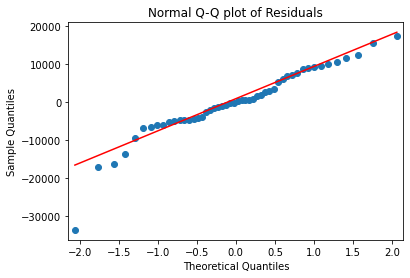

In [35]:
import statsmodels.api as sm
sm.qqplot(model.resid,line='q')
plt.title("Normal Q-Q plot of Residuals")
plt.show()

### Maximum points are close to straight line, hence Normality Condition satisfied

# Residual Plot For Homoscedasticity 

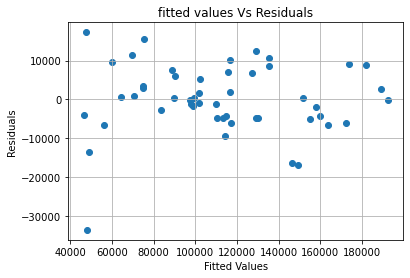

In [36]:
plt.scatter(x=model.fittedvalues,y=model.resid)
plt.xlabel('Fitted Values')
plt.ylabel('Residuals')
plt.title('fitted values Vs Residuals')
plt.grid(True)
plt.show()

### Above plot we can say that the datapoints are close towards zero,hence the assumption for Homoscedasticity satisfied.

# Residual Vs Regressors

eval_env: 1


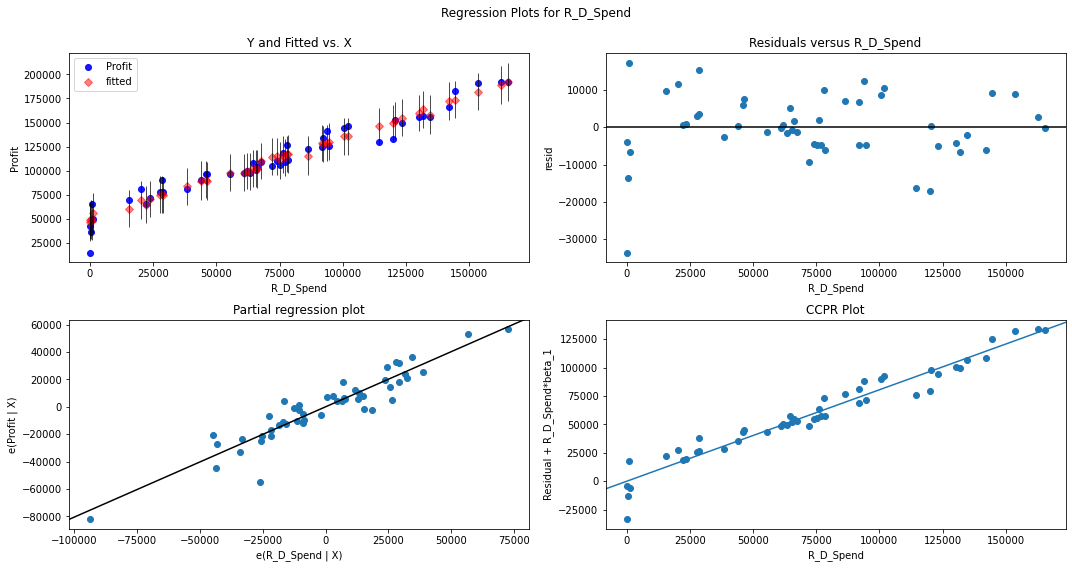

In [37]:
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(model, "R_D_Spend", fig=fig)
plt.show()

eval_env: 1


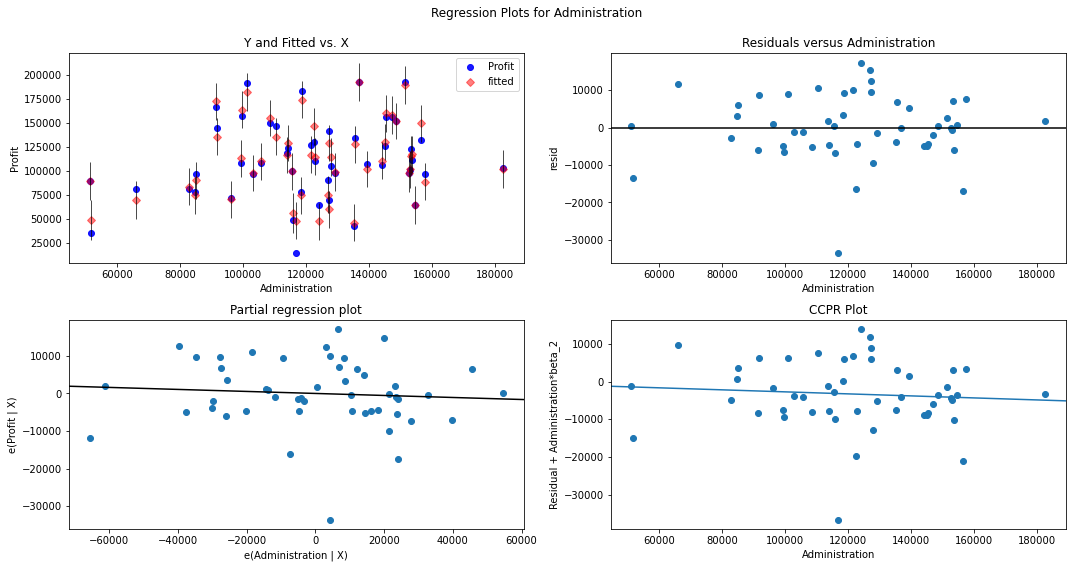

In [38]:
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(model, "Administration", fig=fig)
plt.show()

eval_env: 1


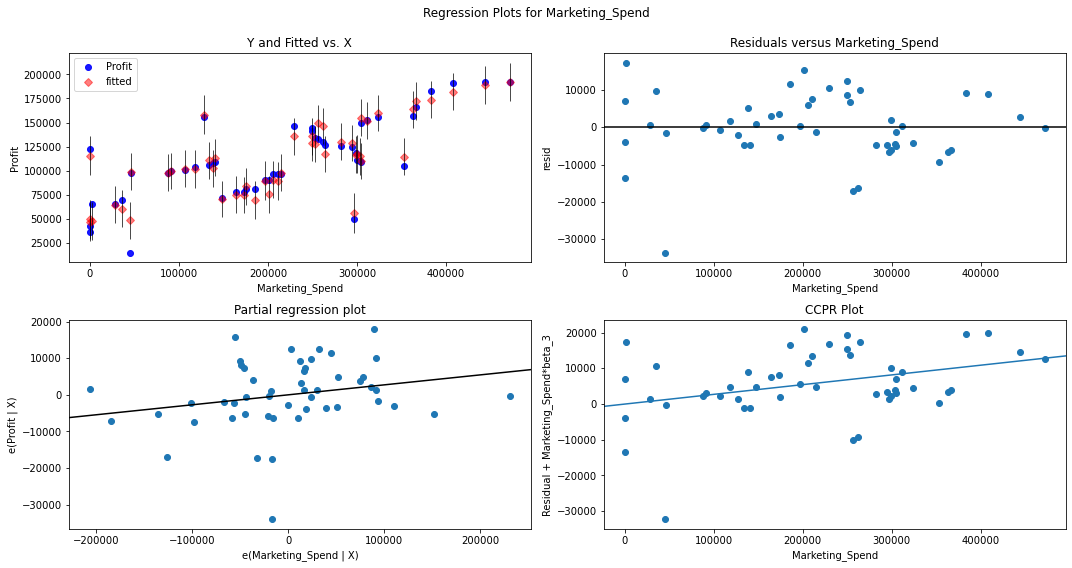

In [39]:
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(model, "Marketing_Spend", fig=fig)
plt.show()

# Detecting Influencers/Outliers
## Cook's distance 

In [44]:
model_influence = model.get_influence()
(c,_)=model_influence.cooks_distance
4/50

0.08

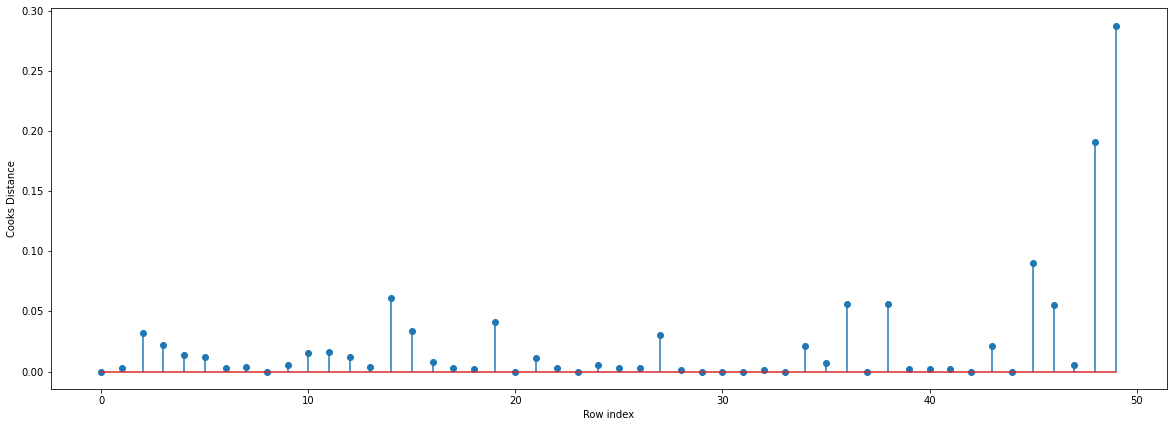

In [45]:
#Plot the influencers values using stem plot
fig = plt.subplots(figsize=(20, 7))
plt.stem(np.arange(len(data)), np.round(c, 3))
plt.xlabel('Row index')
plt.ylabel('Cooks Distance')
plt.show()

In [46]:
#index and value of influencer where c is more.
(np.argmax(c),np.max(c))

(49, 0.2880822927543262)

# to check high Influence points by influence plot

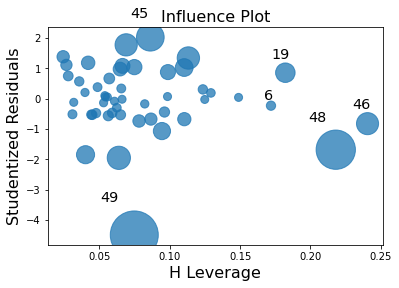

In [47]:
from statsmodels.graphics.regressionplots import influence_plot
influence_plot(model)
plt.show()

In [51]:
k = data.shape[1]
n = data.shape[0] #no of observation
leverage_cutoff = 3*((k + 1)/n)
leverage_cutoff

0.30000000000000004

###  by observing above influence plot and steam plot,we can say that there is no any value which cross the leverage_cutoff, hence we can say that there are no influencers/outliers.

In [63]:
#model accuracy
model.rsquared

0.9507459940683246

# so the model accuracy is : 95.1%

# Using Different Transformations
## 1) SQRT Transformation
## Data Preparation

In [65]:
data['sqrt_RD_Spend']=np.sqrt(data['R_D_Spend'])
data['sqrt_Administration']=np.sqrt(data['Administration'])
data['sqrt_Marketing_Spend']=np.sqrt(data['Marketing_Spend'])
data.head()

,R_D_Spend,Administration,Marketing_Spend,Profit,sqrt_RD_Spend,sqrt_Administration,sqrt_Marketing_Spend
0,165349.20,136897.80,471784.10,192261.83,406.631529,369.997027,686.865416
1,162597.70,151377.59,443898.53,191792.06,403.234051,389.072731,666.257105
2,153441.51,101145.55,407934.54,191050.39,391.716109,318.033882,638.697534
3,144372.41,118671.85,383199.62,182901.99,379.963696,344.487808,619.031195
4,142107.34,91391.77,366168.42,166187.94,376.971272,302.310718,605.118517


# Model building || Model training

In [67]:
model_sqrt = smf.ols('Profit ~ sqrt_RD_Spend + sqrt_Administration + sqrt_Marketing_Spend',data=data).fit()

In [69]:
print('Parameters  : \n' , model_sqrt.params)  
print('p-values    : \n',model_sqrt.pvalues)
print('t values    : \n',model_sqrt.tvalues)

Parameters  : 
 Intercept               26498.066416
sqrt_RD_Spend             349.358053
sqrt_Administration       -22.686341
sqrt_Marketing_Spend       13.711270
dtype: float64
p-values    : 
 Intercept               1.040175e-01
sqrt_RD_Spend           6.055947e-18
sqrt_Administration     6.214024e-01
sqrt_Marketing_Spend    3.640023e-01
dtype: float64
t values    : 
 Intercept                1.658518
sqrt_RD_Spend           13.781821
sqrt_Administration     -0.497220
sqrt_Marketing_Spend     0.916852
dtype: float64


In [71]:
model_sqrt.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Profit   R-squared:                       0.908
Model:                            OLS   Adj. R-squared:                  0.902
Method:                 Least Squares   F-statistic:                     151.3
Date:                Tue, 18 Oct 2022   Prob (F-statistic):           7.80e-24
Time:                        09:24:45   Log-Likelihood:                -541.02
No. Observations:                  50   AIC:                             1090.
Df Residuals:                      46   BIC:                             1098.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept              2.65e+04    1.6e+04      1.659      0.104   -5661.877    5.87e+04
sqrt_RD_Spend          349.3581     25.349     13.782      0.000     298.333     400.383
sqrt_Administration    -22.6863     45.626     -0.497      0.621    -114.527      69.155
sqrt_Marketing_Spend    13.7113     14.955      0.917      0.364     -16.391      43.814
==============================================================================
Omnibus:                        8.679   Durbin-Watson:                   0.828
Prob(Omnibus):                  0.013   Jarque-Bera (JB):                8.356
Skew:                           0.989   Prob(JB):                       0.0153
Kurtosis:                       3.312   Cond. No.                     5.59e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.59e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

# 2) Cube root Transformation
## Data Preparation

In [75]:
# data.drop(['sqrt_RD_Spend','sqrt_Administration','sqrt_Marketing_Spend'],axis=1,inplace=True)

In [77]:
data['cubrt_RD_Spend']=(data['R_D_Spend'])**(1/3)
data['cubrt_Administration']=(data['Administration'])**(1/3)
data['cubrt_Marketing_Spend']=(data['Marketing_Spend'])**(1/3)
data.head()

,R_D_Spend,Administration,Marketing_Spend,Profit,cubrt_RD_Spend,cubrt_Administration,cubrt_Marketing_Spend
0,165349.20,136897.80,471784.10,192261.83,54.886731,51.538545,77.848055
1,162597.70,151377.59,443898.53,191792.06,54.580578,53.295089,76.283024
2,153441.51,101145.55,407934.54,191050.39,53.536210,46.592455,74.164629
3,144372.41,118671.85,383199.62,182901.99,52.459974,49.141594,72.634289
4,142107.34,91391.77,366168.42,166187.94,52.184177,45.043870,71.541871


# Model building

In [80]:
model_cubrt = smf.ols('Profit ~ cubrt_RD_Spend + cubrt_Administration + cubrt_Marketing_Spend',data=data).fit()

In [81]:
print('Parameters  : \n' , model_cubrt.params)  
print('p-values    : \n',model_cubrt.pvalues)
print('t values    : \n',model_cubrt.tvalues)

Parameters  : 
 Intercept                3551.056917
cubrt_RD_Spend           2673.585788
cubrt_Administration       20.852584
cubrt_Marketing_Spend      85.446777
dtype: float64
p-values    : 
 Intercept                9.068037e-01
cubrt_RD_Spend           1.304164e-13
cubrt_Administration     9.730916e-01
cubrt_Marketing_Spend    6.306400e-01
dtype: float64
t values    : 
 Intercept                 0.117718
cubrt_RD_Spend           10.360408
cubrt_Administration      0.033915
cubrt_Marketing_Spend     0.484060
dtype: float64


In [82]:
model_cubrt.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Profit   R-squared:                       0.836
Model:                            OLS   Adj. R-squared:                  0.825
Method:                 Least Squares   F-statistic:                     78.09
Date:                Tue, 18 Oct 2022   Prob (F-statistic):           4.49e-18
Time:                        09:30:08   Log-Likelihood:                -555.48
No. Observations:                  50   AIC:                             1119.
Df Residuals:                      46   BIC:                             1127.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
Intercept              3551.0569   3.02e+04      0.118      0.907   -5.72e+04    6.43e+04
cubrt_RD_Spend         2673.5858    258.058     10.360      0.000    2154.142    3193.030
cubrt_Administration     20.8526    614.847      0.034      0.973   -1216.771    1258.476
cubrt_Marketing_Spend    85.4468    176.521      0.484      0.631    -269.872     440.765
==============================================================================
Omnibus:                        7.676   Durbin-Watson:                   0.513
Prob(Omnibus):                  0.022   Jarque-Bera (JB):                7.735
Skew:                           0.963   Prob(JB):                       0.0209
Kurtosis:                       2.949   Cond. No.                     1.07e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.07e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

# 3) Standard Scalar Transformation
## Data Preparation

In [86]:
# data.drop(['cubrt_RD_Spend','cubrt_Administration','cubrt_Marketing_Spend'],axis=1,inplace=True)
data.head()

,R_D_Spend,Administration,Marketing_Spend,Profit
0,165349.20,136897.80,471784.10,192261.83
1,162597.70,151377.59,443898.53,191792.06
2,153441.51,101145.55,407934.54,191050.39
3,144372.41,118671.85,383199.62,182901.99
4,142107.34,91391.77,366168.42,166187.94


In [87]:
#transforming data in standard scalar
from sklearn.preprocessing import StandardScaler
std_scaler = StandardScaler()
scaled_data = std_scaler.fit_transform(data[['R_D_Spend','Administration','Marketing_Spend']])
scaled_data = pd.DataFrame(data=scaled_data)
scaled_data.columns=['R_D_Spend','Administration','Marketing_Spend']

In [90]:
scaled_data['Profit']=data['Profit']
scaled_data.head()

,R_D_Spend,Administration,Marketing_Spend,Profit
0,2.016411,0.560753,2.153943,192261.83
1,1.955860,1.082807,1.923600,191792.06
2,1.754364,-0.728257,1.626528,191050.39
3,1.554784,-0.096365,1.422210,182901.99
4,1.504937,-1.079919,1.281528,166187.94


In [93]:
#before scaling mean and standard deviation
print('mean  : \n ',data.mean() ,'\n','SD   :\n', data.std())

mean  : 
  R_D_Spend           73721.6156
Administration     121344.6396
Marketing_Spend    211025.0978
Profit             112012.6392
dtype: float64 
 SD   :
 R_D_Spend           45902.256482
Administration      28017.802755
Marketing_Spend    122290.310726
Profit              40306.180338
dtype: float64


In [94]:
#after scaling mean and standard deviation
print('mean  : \n ',scaled_data.mean() ,'\n','SD   :\n', scaled_data.std())

mean  : 
  R_D_Spend          1.199041e-16
Administration    -2.919887e-16
Marketing_Spend   -9.325873e-17
Profit             1.120126e+05
dtype: float64 
 SD   :
 R_D_Spend              1.010153
Administration         1.010153
Marketing_Spend        1.010153
Profit             40306.180338
dtype: float64


### after scaling the input variables,

### mean of input variables becomes 0
### sd of input variables becomes 1
### means that it follows standard normal distribution, i.e. X ~ N(0,1)

# Model building

In [95]:
model_std_scalar = smf.ols('Profit ~ R_D_Spend+Administration+Marketing_Spend',data=scaled_data).fit()

In [96]:
print('Parameters  : \n' , model_std_scalar.params) 

Parameters  : 
 Intercept          112012.639200
R_D_Spend           36612.429551
Administration       -743.773321
Marketing_Spend      3296.263048
dtype: float64


In [98]:
model_std_scalar.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Profit   R-squared:                       0.951
Model:                            OLS   Adj. R-squared:                  0.948
Method:                 Least Squares   F-statistic:                     296.0
Date:                Tue, 18 Oct 2022   Prob (F-statistic):           4.53e-30
Time:                        09:38:43   Log-Likelihood:                -525.39
No. Observations:                  50   AIC:                             1059.
Df Residuals:                      46   BIC:                             1066.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept         1.12e+05   1305.649     85.791      0.000    1.09e+05    1.15e+05
R_D_Spend        3.661e+04   2051.533     17.846      0.000    3.25e+04    4.07e+04
Administration   -743.7733   1415.345     -0.526      0.602   -3592.715    2105.168
Marketing_Spend  3296.2630   1991.607      1.655      0.105    -712.633    7305.159
==============================================================================
Omnibus:                       14.838   Durbin-Watson:                   1.282
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               21.442
Skew:                          -0.949   Prob(JB):                     2.21e-05
Kurtosis:                       5.586   Cond. No.                         2.78
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

# Now we compare the R-square values and AIC,BIC values for all models to get best model.
## Table of R Square values from our all fitted models

In [100]:
R_square_table=pd.DataFrame(data=
                                  {
                                  'model':[model.rsquared,model.aic,model.bic],
                                  'sqrt_model':[model_sqrt.rsquared,model_sqrt.aic,model_sqrt.bic],
                                  'cubrt_model':[model_cubrt.rsquared,model_cubrt.aic,model_cubrt.bic],
                                  'std_scalar_model':[model_std_scalar.rsquared,model_std_scalar.aic,model_std_scalar.bic]
                                   }
                            ).T


In [102]:
R_square_table.columns=['R_Square_values','AIC','BIC']

In [103]:
R_square_table

,R_Square_values,AIC,BIC
model,0.950746,1058.771499,1066.419591
sqrt_model,0.907957,1090.034661,1097.682753
cubrt_model,0.835866,1118.956125,1126.604217
std_scalar_model,0.950746,1058.771499,1066.419591


## From above table we observe that the R_Square_values,AIC values and BIC values from model of Raw data and Standard_Scaler transformation are same and having best values as compare to other transformations.
## --> Hence we select any model between these two models as our best model for prediction

# Model Selection 
### we can selet any model between our best two models.I use model from our raw data for prediction
## Prediction

In [104]:
actual = data["Profit"]

In [105]:
data.drop('Profit',axis=1,inplace=True)

In [107]:
pred_y = model.predict(data)

In [108]:
#predicted values
pred_y.head(10)

0    192521.252890
1    189156.768232
2    182147.279096
3    173696.700026
4    172139.514183
5    163580.780571
6    158114.096669
7    160021.363048
8    151741.699699
9    154884.684110
dtype: float64

In [109]:
#or we can see predicted values by following
model.fittedvalues.head(10)

0    192521.252890
1    189156.768232
2    182147.279096
3    173696.700026
4    172139.514183
5    163580.780571
6    158114.096669
7    160021.363048
8    151741.699699
9    154884.684110
dtype: float64

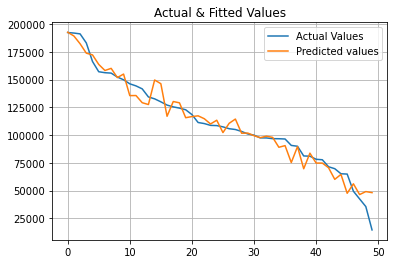

In [110]:
#plot for actual and fitted  values
plt.plot(actual,label='Actual Values')
plt.plot(pred_y,label='Predicted values')
plt.title('Actual & Fitted Values')
legend=plt.legend()
plt.grid(True)
plt.show()